In [33]:
import pandas as pd 
import numpy as np 
from bs4 import BeautifulSoup
import requests
from geopy.geocoders import Nominatim
from helpers import *
import matplotlib.pyplot as plt
import folium
print('libraries imported')


libraries imported


### Step 1: Get the city names dataset with lat and lng coordinates

For this project, we need to acquire the names of the Cities in Attica region. The following wikipedia link [[1]](https://en.wikipedia.org/wiki/List_of_settlements_in_Attica) contains the name of each city, hence it will be used.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_settlements_in_Attica'

In [3]:
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
# uncomment if you want to check the html tags
#print(soup.prettify()) 

In [4]:
neighborhoods_names= []

In [5]:
for td in soup.findAll('td'):
     for a in td.findAll('a'):
             neighborhoods_names.append(a.get('title'))


In [7]:
neighborhoods_names

['Acharnes',
 'Afidnes',
 'Agia Paraskevi',
 'Agia Varvara',
 'Agioi Anargyroi',
 'Agios Dimitrios',
 'Agios Ioannis Rentis',
 'Agios Konstantinos, East Attica',
 'Agios Stefanos, Attica',
 'Aigaleo',
 'Alimos',
 'Amarousio',
 'Anavyssos',
 'Ano Liosia',
 'Anoixi',
 'Anthousa, Attica',
 'Argyroupoli',
 'Artemida, Attica',
 'Aspropyrgos',
 'Athens',
 'Avlonas, Attica',
 'Chaidari',
 'Chalandri',
 'Cholargos',
 'Dafni, Attica',
 'Dionysos, Greece',
 'Drapetsona',
 'Drosia',
 'Ekali',
 'Eleusis',
 'Elliniko',
 'Erythres',
 'Filothei',
 'Fyli',
 'Galatsi',
 'Gerakas',
 'Glyfada',
 'Glyka Nera',
 'Grammatiko',
 'Ilion, Greece',
 'Ilioupoli',
 'Irakleio, Attica',
 'Kaisariani',
 'Kalamos, Attica',
 'Kallithea',
 'Kalyvia Thorikou',
 'Kamatero',
 'Kapandriti',
 'Keratea',
 'Keratsini',
 'Kifisia',
 'Korydallos',
 'Kouvaras',
 'Kropia',
 'Kryoneri, Attica',
 'Lavreotiki',
 'Lykovrysi',
 'Magoula, Attica',
 'Malakasa',
 'Mandra',
 'Marathon, Greece',
 'Markopoulo Mesogaias',
 'Markopoulo Oropou

In [6]:
coordinates = {'City':[],'Latitude':[], 'Longitude':[]}
coordinates['City'] = neighborhoods_names

In [7]:
#some names produced wrong results therefore i manually changed them
for i,j in enumerate(coordinates['City']):
    if 'Amarousio' in j:
        print('found')
        coordinates['City'][i]= 'Marousi, Attica'
    elif 'Erythres' in j:
        print('found')
        coordinates['City'][i]= 'Erythraia, Attica'
    elif 'Drosia' in j :
        print ('found')
        coordinates['City'][i]= 'Drosia, Attica'
    elif 'Vari'in j :
        print('found')
        coordinates['City'][i] = 'Vari, Attica'
    elif 'Irakleio' in j :
        print('found')
        coordinates['City'][i] = 'Iraklio, Attica'
    elif 'Palaia Fokaia' in j :
        print('found')
        coordinates['City'][i] = 'Palaia Fokea, Attica'
 

found
found
found
found
found
found


In [8]:
geolocator = Nominatim(user_agent="my-app")

In [9]:
for address in coordinates['City']:
    try:
        location = geolocator.geocode(address)
        coordinates['Latitude'].append(location.latitude)
        coordinates['Longitude'].append(location.longitude)
        print('found')
    except AttributeError:
        coordinates['Latitude'].append(np.nan)
        coordinates['Longitude'].append(np.nan)
        print('not found')

found
found
found
found
found
found
found
found
found
found
found
found
found
found
not found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found


In [10]:
df = pd.DataFrame(coordinates)

In [11]:
df.head()

,City,Latitude,Longitude
0,Acharnes,38.084161,23.736865
1,Afidnes,38.205653,23.836414
2,Agia Paraskevi,40.481027,23.048260
3,Agia Varvara,35.133087,24.998196
4,Agioi Anargyroi,36.733618,24.498111


In [12]:
#check for null values
df[df['Latitude'].isna() == True]

,City,Latitude,Longitude
14,Anoixi,NaN,NaN


In [13]:
#Anoixh
df.iloc[14,1] = 38.14636
df.iloc[14,2] = 23.86203

Check the data again

In [16]:
df.isnull().sum()

City         0
Latitude     0
Longitude    0
dtype: int64

Add a few more values to the data

In [14]:
df['Region']= 'Attica'
df['Country']= 'Greece'

In [15]:
df.head()

,City,Latitude,Longitude,Region,Country
0,Acharnes,38.084161,23.736865,Attica,Greece
1,Afidnes,38.205653,23.836414,Attica,Greece
2,Agia Paraskevi,40.481027,23.048260,Attica,Greece
3,Agia Varvara,35.133087,24.998196,Attica,Greece
4,Agioi Anargyroi,36.733618,24.498111,Attica,Greece


Save the data to csv for later use

In [34]:
#df.to_csv('data/cities_of_attica.csv',index=False)
df= pd.read_csv('data/cities_of_attica.csv')

### Step 2: Collect the dataset of the venues

To acquire the venues you need to have a Client_id and a Client_secret to access foursquare api 

In [49]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100# A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [36]:
address = 'Attica, Greece'

geolocator = Nominatim(user_agent="my-app")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of attica are {}, {}.'.format(latitude, longitude))
radius= 800

The geograpical coordinate of attica are 37.9946543, 23.79940251269328.


In [33]:
map = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lon, poi in zip(df['Latitude'], df['Longitude'], df['City']):
        label = folium.Popup(str(poi), parse_html=True)
        # folium.Marker([lat, lon]).add_to(map)
        folium.Circle([lat, lon],
                      radius=radius,
                      popup=label
                      ).add_to(map)
map

In [37]:
#you can find this function in the helper.py file

attica_venues = getNearbyVenues(df['City'],
                                df['Latitude'],
                                df['Longitude'],
                                radius, 
                                CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT)

Acharnes
Afidnes
Agia Paraskevi
Agia Varvara
Agioi Anargyroi
Agios Dimitrios
Agios Ioannis Rentis
Agios Konstantinos, East Attica
Agios Stefanos, Attica
Aigaleo
Alimos
Marousi, Attica
Anavyssos
Ano Liosia
Anoixi
Anthousa, Attica
Argyroupoli
Artemida, Attica
Aspropyrgos
Athens
Avlonas, Attica
Chaidari
Chalandri
Cholargos
Dafni, Attica
Dionysos, Greece
Drapetsona
Drosia, Attica
Ekali
Eleusis
Elliniko
Erythraia, Attica
Filothei
Fyli
Galatsi
Gerakas
Glyfada
Glyka Nera
Grammatiko
Ilion, Greece
Ilioupoli
Iraklio, Attica
Kaisariani
Kalamos, Attica
Kallithea
Kalyvia Thorikou
Kamatero
Kapandriti
Keratea
Keratsini
Kifisia
Korydallos
Kouvaras
Kropia
Kryoneri, Attica
Lavreotiki
Lykovrysi
Magoula, Attica
Malakasa
Mandra
Marathon, Greece
Markopoulo Mesogaias
Markopoulo Oropou
Megara
Melissia
Metamorfosi
Moschato
Nea Chalkidona
Nea Erythraia
Nea Filadelfeia
Nea Ionia
Nea Makri
Nea Palatia
Nea Penteli
Nea Peramos
Nea Smyrni
Neo Psychiko
Nikaia, Attica
Oinoi
Oropos
Paiania
Palaia Fokea, Attica
Palaio F

In [38]:
attica_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acharnes,38.084161,23.736865,Ωδείο,38.083012,23.737051,Café
1,Acharnes,38.084161,23.736865,Lemonia',38.080645,23.736461,Café
2,Acharnes,38.084161,23.736865,YOU N•A•I•L•S ,38.081396,23.737528,Cosmetics Shop
3,Acharnes,38.084161,23.736865,Bartist Cafe/Bar,38.080025,23.736392,Cocktail Bar
4,Acharnes,38.084161,23.736865,ΣΤΑΜΟΥ,38.079146,23.738201,Ice Cream Shop


In [39]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [40]:
grouped_data = attica_venues.groupby('Neighborhood').count().reset_index()[['Venue','Neighborhood']]

<AxesSubplot:xlabel='Neighborhood', ylabel='Venue'>

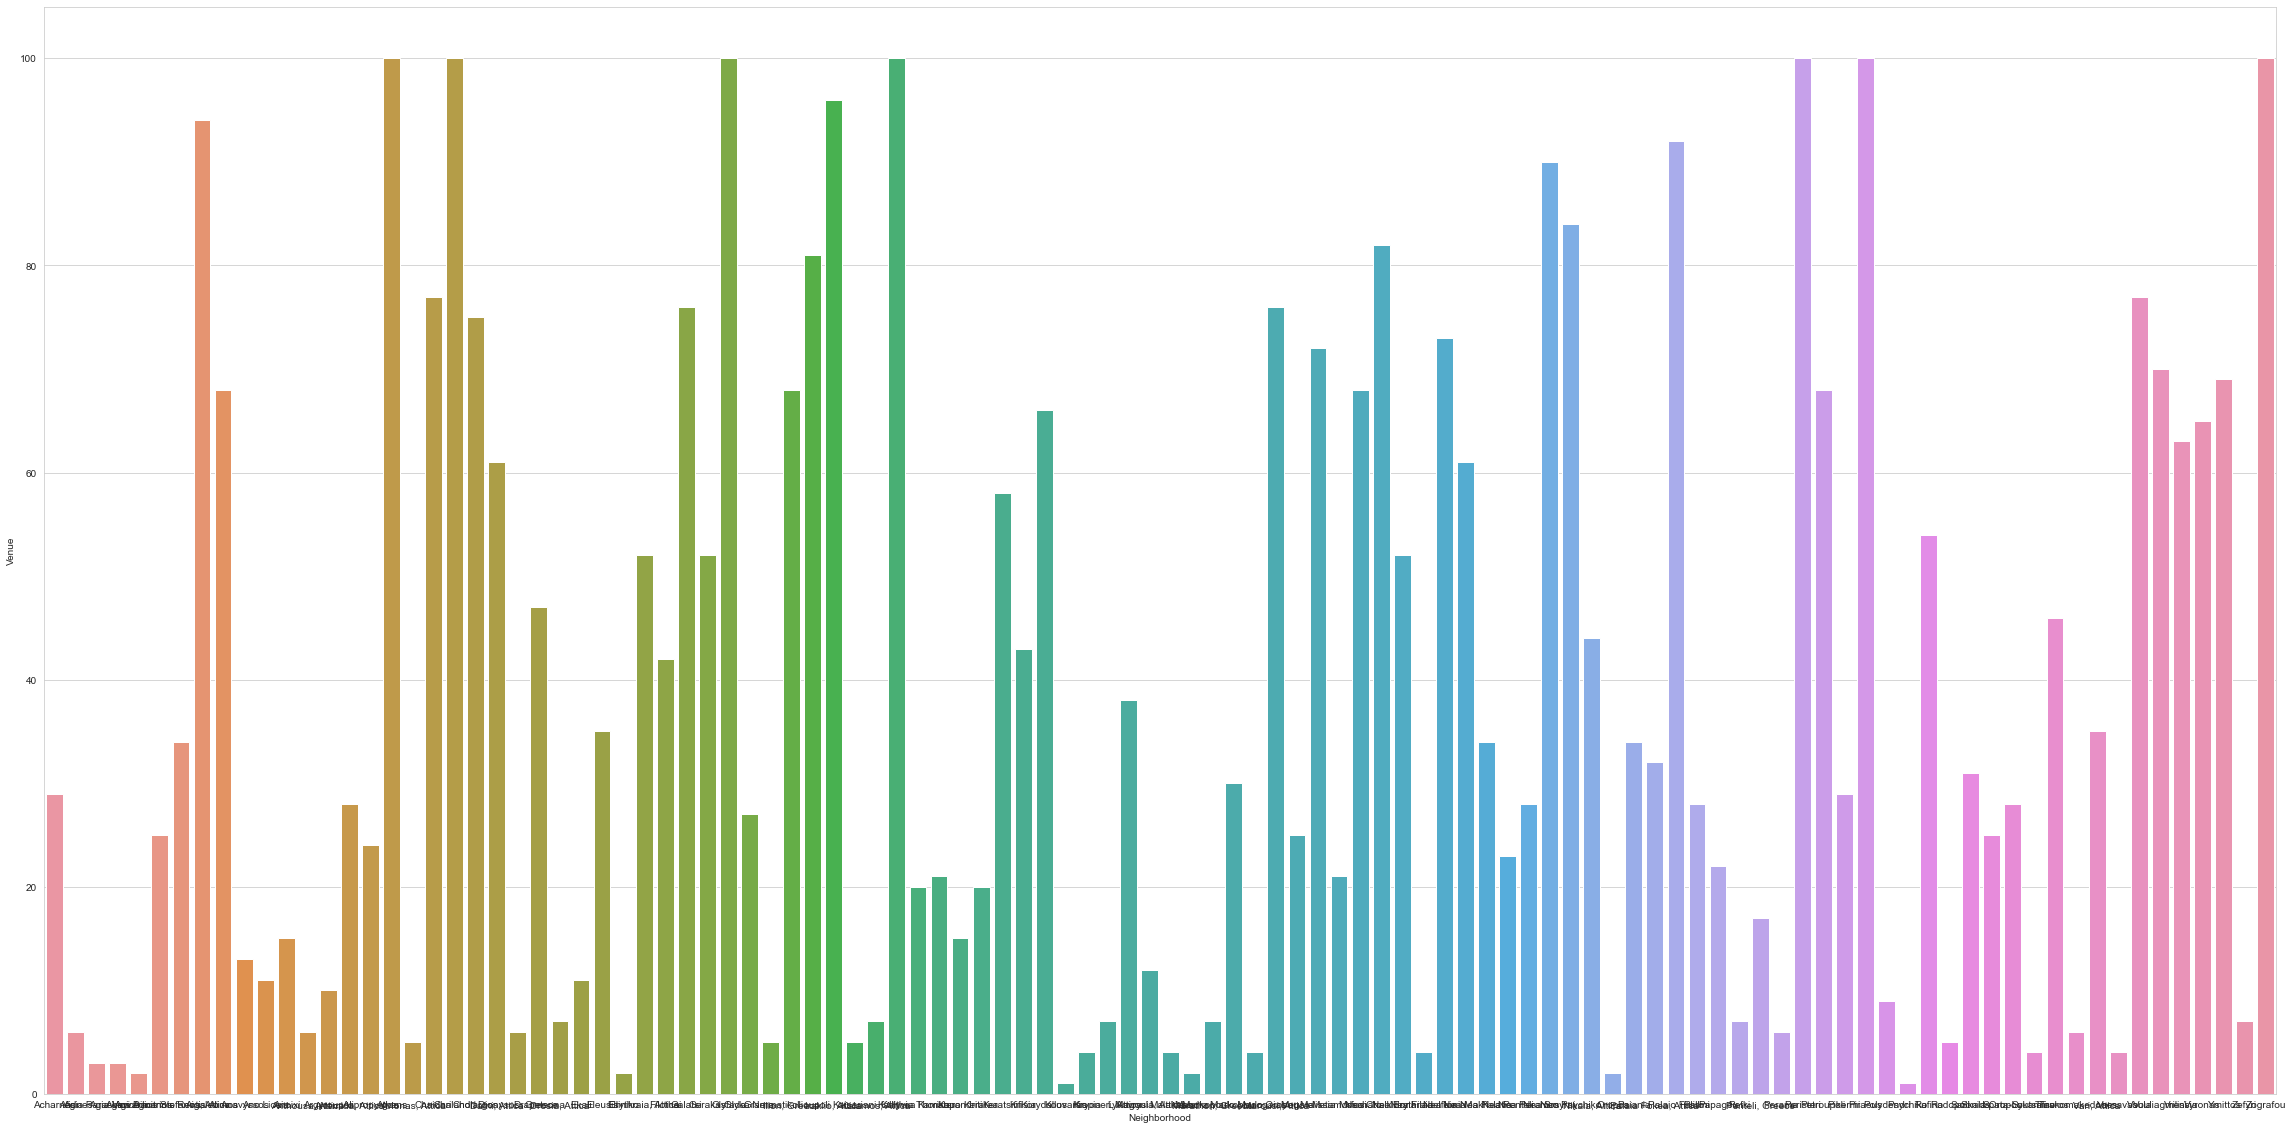

In [38]:
plt.figure(figsize=(40,20))
sns.barplot(data=grouped_data, x="Neighborhood", y="Venue")

There are alot of venues returned from the foursquare API.Let's try to filter out the categories since we are mostly interested in areas with bars, restaurants, cafes and etc.

In [41]:
attica_venues['Venue Category'].value_counts()

Café                   440
Greek Restaurant       204
Coffee Shop            193
Bakery                 146
Supermarket            145
                      ... 
Skate Park               1
Toll Booth               1
Japanese Restaurant      1
Adult Boutique           1
Cultural Center          1
Name: Venue Category, Length: 266, dtype: int64

In [23]:
grouped_data.describe()

,Venue
count,106.000000
mean,38.047170
std,31.862318
min,1.000000
25%,7.000000
50%,28.500000
75%,67.500000
max,100.000000


In [42]:
grouped_data = grouped_data[grouped_data['Venue'] >= 10]

In [43]:
attica_venues['label'] = attica_venues['Neighborhood'].apply(lambda x : 1 if any(i in x for i in grouped_data['Neighborhood']) else 0)

In [44]:
attica_venues = attica_venues[attica_venues['label']==1]
attica_venues.drop(['label'], axis=1, inplace= True)

In [45]:
list_of_categories = ['store', 'movie', 'shop', 'salon', 'plaza', 'playground', 'station','metro','market', 'sports','stadium','boutique', 'court','booth', 'gym', 'stop']

In [46]:
attica_venues['labels']= attica_venues['Venue Category'].apply(lambda x: 1 if any(i in x.lower() for i in list_of_categories) else 0)


In [47]:
attica_venues = attica_venues[attica_venues['labels']==0].reset_index(drop= True)

<AxesSubplot:>

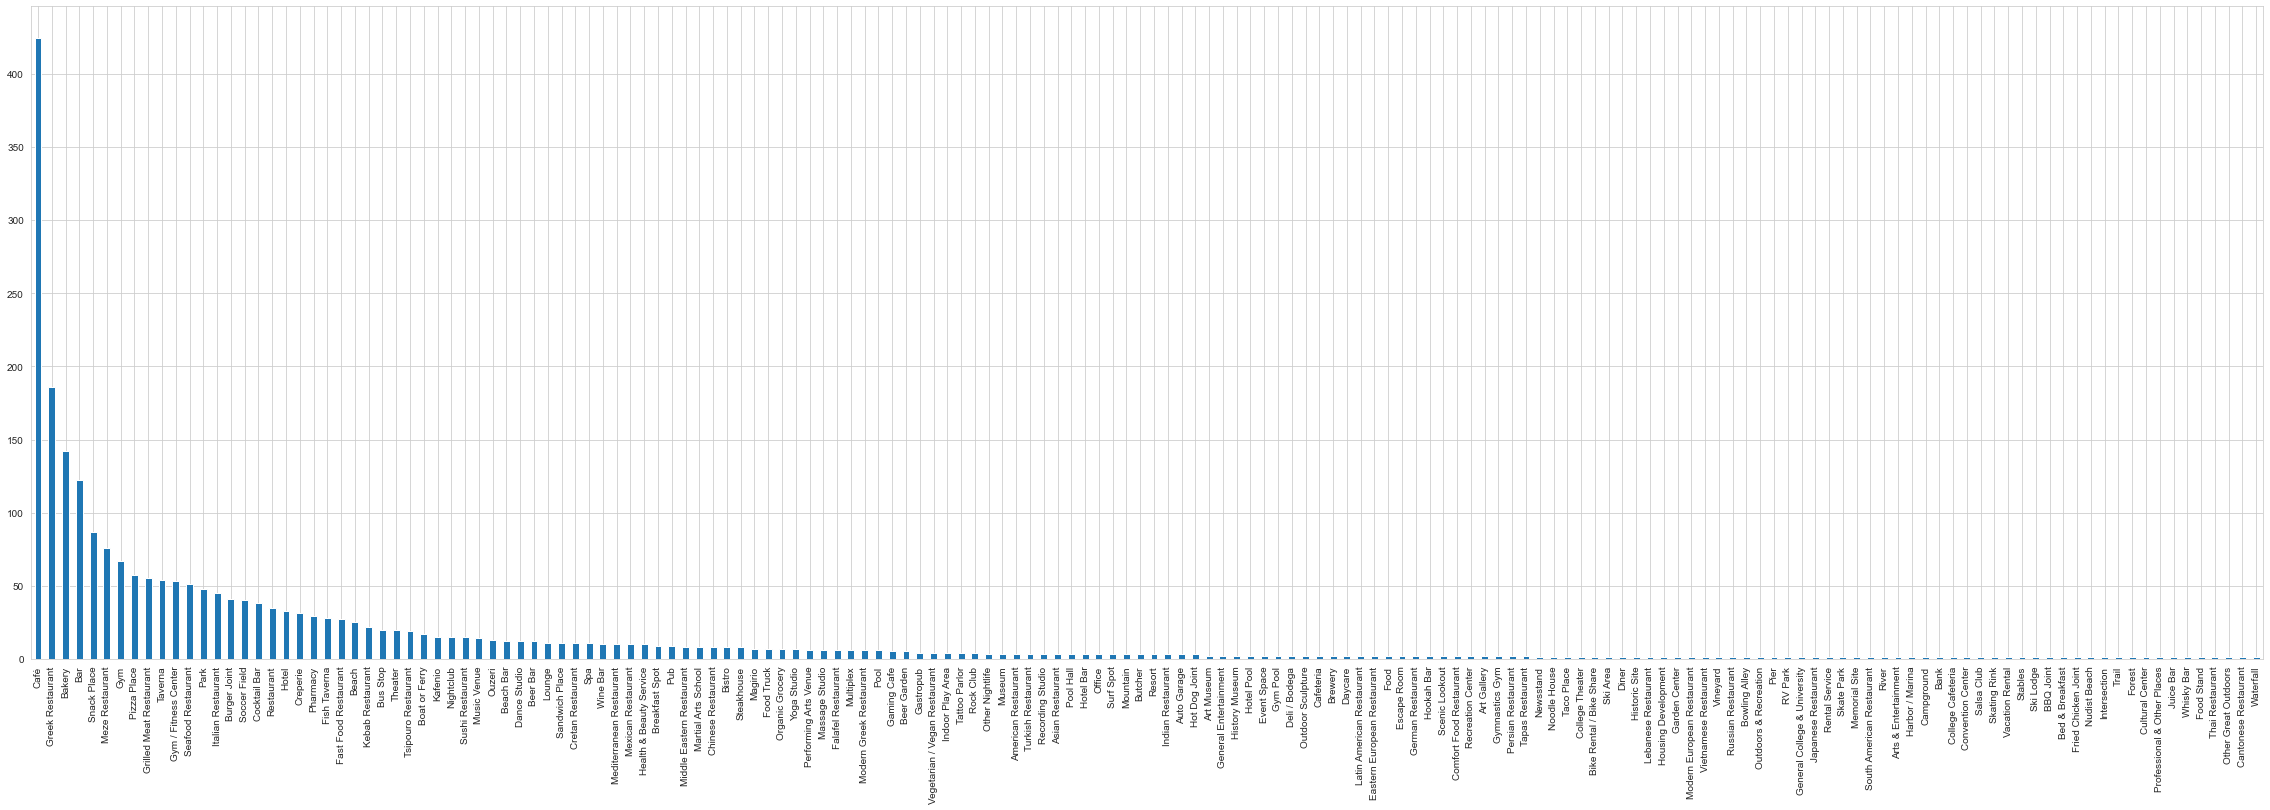

In [31]:
plt.figure(figsize=(40,12))
attica_venues['Venue Category'].value_counts().plot(kind='bar')

In [48]:
#attica_venues.to_csv('data/venues_attica.csv', index= False)